<a href="https://colab.research.google.com/github/jaguzman/GENERAL-FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/3_Aprendizaje%20No%20Supervisado/K_Means_y_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means y PCA!

**Datos de Tarjetas de Crédito**

Se cuenta con una base de datos del comportamiento de uso de aproximadamente 9000 titulares activos de tarjetas de crédito. El conjunto de muestras se tomó durante 6 meses. Se tienen algunos datos básicos de los clientes: edad, género, ingresos mensuales y puntaje de gastos. La puntuación de gasto es algo que se le asigna al cliente en función de sus compras y los tipos de compra.

Información del dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

**OBJETIVO**

Realizar un análisis de segmentación de clientes para definir una estrategia de marketing.

**Contenido**

*   Importar librerías
*   Base de datos
*   Preparación de los datos para el algoritmo
    - Datos nulos
    - Estandarización de los valores
    - PCA
*   Clusterización de los datos: K-Means
*   Visualización de los datos

# **LIBRERÍAS**

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np

# Librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

# Librerías de Aprendizaje de máquinas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **BASE DE DATOS**

In [2]:
# Leer los datos desde el GitHub
ccData = pd.read_csv(
    "https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/credictCardDataset.csv",
    sep = ',',         # Se especifica el separador de los datos
    thousands = None,  # Se especifica el separador de miles
    decimal = '.')     # Se especifica el separador de los decimales

# Imprimir el tamaño de la base de datos
print(ccData.shape)
# Imprimir las primeras líneas
ccData.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**DESCRIPCIÓN DE LA BASE DE DATOS**

**Registros de las tarjetas de crédito**

**[1] CUSTID:** identificación del titular de la tarjeta de crédito (categórica)

**[2] BALANCE:** saldo restante en su cuenta para realizar compras (numérica)

**[3] BALANCEFREQUENCY:** ¿el saldo se actualiza con frecuencia? (numérico) [1 = actualizado con frecuencia, 0 = no actualizado con frecuencia] 

**[4] PURCHASES:** cantidad de compras realizadas desde la cuenta (numérico)

**[5] ONEOFFPURCHASES:** monto máximo de compra realizadas a una cuota (numérico)

**[6] INSTALLMENTSPURCHASES:** cantidad de compra realizada a diferentes cuotas (numérico)

**[7] CASHADVANCE:** monto de avances en efectivo (numérico)

**[8] PURCHASESFREQUENCY:** ¿realiza compras con fecuencia? (numérico) [1 = comprado con frecuencia, 0 = no comprado con frecuencia]

**[9] ONEOFFPURCHASESFREQUENCY:** ¿realiza compras a una cuota con frecuencia?  (numérico) [1 = comprado con frecuencia, 0 = no comprado con frecuencia]

**[10] PURCHASESINSTALLMENTSFREQUENCY:** ¿realiza compras a diferentes cuotas con frecuencia? (numérico) [1 = con frecuencia, 0 = con poca frecuencia]

**[11] CASHADVANCEFREQUENCY:** con qué frecuencia se paga el efectivo por adelantado (numérico)

**[12] CASHADVANCETRX:** número de transacciones realizadas con "efectivo por adelantado" (numérico)

**[13] PURCHASESTRX:** número de transacciones de compra realizadas (numérico)

**[14] CREDITLIMIT:** límite del crédito para el usuario (numérico)

**[15] PAYMENTS:** monto de pagos realizado por el usuario (numérico)

**[16] MINIMUM_PAYMENTS:** monto mínimo pagado por el usuario (numérico)

**[17] PRCFULLPAYMENT:** porcentaje del pago total pagado por el usuario (numérico)

**[18] TENURE:** tenencia de la tarjeta de crédito (numérico)

In [3]:
# Información de la base de datos: nómbre de la columba, conteo de datos Null y tipo de datos
ccData.info()
# La base de TIENE datos nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# **PREPARACIÓN DE LOS DATOS PARA EL ALGORITMO**

In [4]:
# Se elimina la columna 'CUST_ID'
ccData = ccData.drop(columns=['CUST_ID'])
# Imprimir los primeros 5 datos de la base de datos
ccData.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Datos nulos**

In [5]:
# número de datos nulos
ccData.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE_FREQUENCY        0
dtype: int64

Se rellenan esos valores con la media de la columna

In [0]:
ccData.loc[(ccData['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=ccData['MINIMUM_PAYMENTS'].mean()
ccData.loc[(ccData['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=ccData['CREDIT_LIMIT'].mean()

In [7]:
# número de datos nulos
ccData.isnull().sum().sort_values(ascending=False).head()

TENURE                        0
ONEOFF_PURCHASES_FREQUENCY    0
BALANCE_FREQUENCY             0
PURCHASES                     0
ONEOFF_PURCHASES              0
dtype: int64

**Estandarización de los valores**

In [8]:
#Descripción de los datos numéricos
ccData.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Se puede ver que los datos tiene valores atípicos (outlier). En general es un valor que dista del resto de los datos. 

Además, los rangos de las diferentes columnas son muy diferentes. 

Al eliminar los valores atípicos se pueden perder muchas filas, entonces se harán rangos los diferentes valores.

In [0]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    ccData[Range]=0        
    ccData.loc[((ccData[c]>0)&(ccData[c]<=500)),Range]=1
    ccData.loc[((ccData[c]>500)&(ccData[c]<=1000)),Range]=2
    ccData.loc[((ccData[c]>1000)&(ccData[c]<=3000)),Range]=3
    ccData.loc[((ccData[c]>3000)&(ccData[c]<=5000)),Range]=4
    ccData.loc[((ccData[c]>5000)&(ccData[c]<=10000)),Range]=5
    ccData.loc[((ccData[c]>10000)),Range]=6
 


In [0]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    ccData[Range]=0
    ccData.loc[((ccData[c]>0)&(ccData[c]<=0.1)),Range]=1
    ccData.loc[((ccData[c]>0.1)&(ccData[c]<=0.2)),Range]=2
    ccData.loc[((ccData[c]>0.2)&(ccData[c]<=0.3)),Range]=3
    ccData.loc[((ccData[c]>0.3)&(ccData[c]<=0.4)),Range]=4
    ccData.loc[((ccData[c]>0.4)&(ccData[c]<=0.5)),Range]=5
    ccData.loc[((ccData[c]>0.5)&(ccData[c]<=0.6)),Range]=6
    ccData.loc[((ccData[c]>0.6)&(ccData[c]<=0.7)),Range]=7
    ccData.loc[((ccData[c]>0.7)&(ccData[c]<=0.8)),Range]=8
    ccData.loc[((ccData[c]>0.8)&(ccData[c]<=0.9)),Range]=9
    ccData.loc[((ccData[c]>0.9)&(ccData[c]<=1.0)),Range]=10
    

In [0]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    ccData[Range]=0
    ccData.loc[((ccData[c]>0)&(ccData[c]<=5)),Range]=1
    ccData.loc[((ccData[c]>5)&(ccData[c]<=10)),Range]=2
    ccData.loc[((ccData[c]>10)&(ccData[c]<=15)),Range]=3
    ccData.loc[((ccData[c]>15)&(ccData[c]<=20)),Range]=4
    ccData.loc[((ccData[c]>20)&(ccData[c]<=30)),Range]=5
    ccData.loc[((ccData[c]>30)&(ccData[c]<=50)),Range]=6
    ccData.loc[((ccData[c]>50)&(ccData[c]<=100)),Range]=7
    ccData.loc[((ccData[c]>100)),Range]=8

In [12]:
ccData.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


In [13]:
ccData.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)
ccData.head()


,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler

X= np.asarray(ccData)
scale = StandardScaler()
X = scale.fit_transform(ccData)
TEST = scale.fit_transform(ccData)
X.shape

(8950, 17)

**PCA**

Para hacer el análisis de PCA, se hacen diferentes pruebas para diferentes números de componentes principlaes.
Primero se espera encontrar la mayor varianza para 1 sola componenes, depues la segunda de mayor varianza y así.

In [15]:
# PCA

for i in range(10):

  pca = PCA(n_components = i+1, whiten= True )  # whitten = normalize
  pca.fit(X)

  print('Componentes:', i+1, '. Varianza total: ', sum(pca.explained_variance_ratio_), 'porciónde la varianza: ', pca.explained_variance_ratio_)

Componentes: 1 . Varianza total:  0.3232997399092371 porciónde la varianza:  [0.32329974]
Componentes: 2 . Varianza total:  0.5468370684346497 porciónde la varianza:  [0.32329974 0.22353733]
Componentes: 3 . Varianza total:  0.6372580353026522 porciónde la varianza:  [0.32329974 0.22353733 0.09042097]
Componentes: 4 . Varianza total:  0.7110935848776513 porciónde la varianza:  [0.32329974 0.22353733 0.09042097 0.07383555]
Componentes: 5 . Varianza total:  0.7739061600765529 porciónde la varianza:  [0.32329974 0.22353733 0.09042097 0.07383555 0.06281258]
Componentes: 6 . Varianza total:  0.8266189961529465 porciónde la varianza:  [0.32329974 0.22353733 0.09042097 0.07383555 0.06281258 0.05271284]
Componentes: 7 . Varianza total:  0.8686427918549938 porciónde la varianza:  [0.32329974 0.22353733 0.09042097 0.07383555 0.06281258 0.05271284
 0.0420238 ]
Componentes: 8 . Varianza total:  0.9020195926182324 porciónde la varianza:  [0.32329974 0.22353733 0.09042097 0.07383555 0.06281258 0.052

Se puede ver que en sólo 9 componentes se más del 90% de la variabilidad de los datos de 18 columnas. 

In [16]:
#%% PCA

pca = PCA(n_components = 9, whiten= True )  # whitten = normalize
pca.fit(X)

x_pca = pca.transform(X)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.32329974 0.22353733 0.09042097 0.07383555 0.06281258 0.05271284
 0.0420238  0.0333768  0.02873393]
sum:  0.9307535194506369


In [17]:
x_pca.shape

(8950, 9)

In [18]:
x_pca[0]

array([-0.45144347, -1.25569662, -0.14811654, -0.69921313, -0.37126793,
       -0.66773518, -0.63338444,  0.50972002,  0.75217686])

Para determinar el mejor número de clusters se ejecuta el algoritmo para diferentes valores de K (1-15) y se gráfica el error cuadrático medio (SSE) con respecto a K.

# **K-Means**

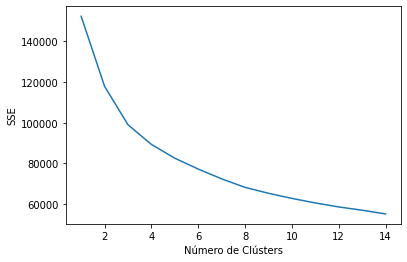

In [19]:
# %% KMEANS
wcss = []
#X = x_pca

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("Número de Clústers")
plt.ylabel("SSE")
plt.show()

Se seleccionan 6 grupos, debido a que el "codo" de la gráfica es más evidente en k=5

In [20]:
# Modelo K-Means de 6 clusters
kmeans_model = KMeans(n_clusters=6)
# Entrenamiento del modelo
clusters = kmeans_model.fit_predict(X)
# Se agraga una columna con el número del grupo al que pertenece cada cliente
ccData["cluster"] = clusters
# Imprimir los primeros 6 datos de la base de datos
ccData.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,2
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,5
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,0
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,0


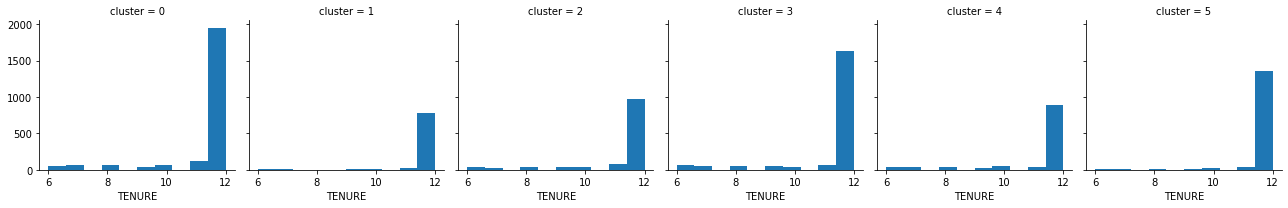

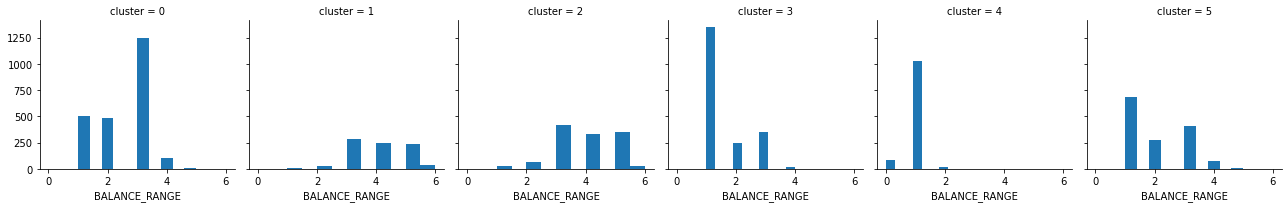

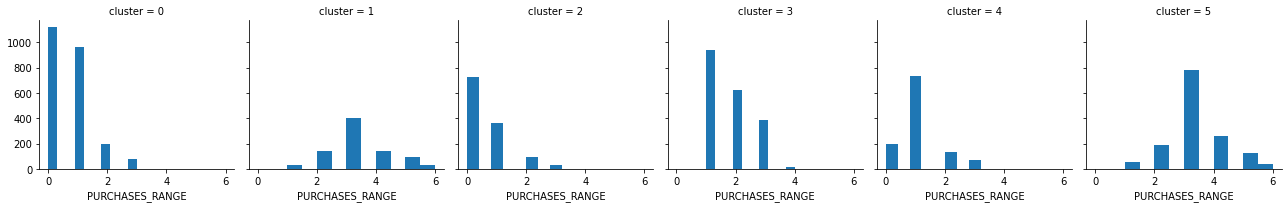

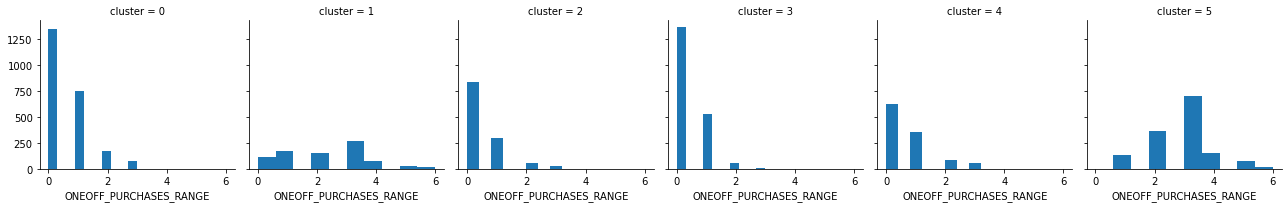

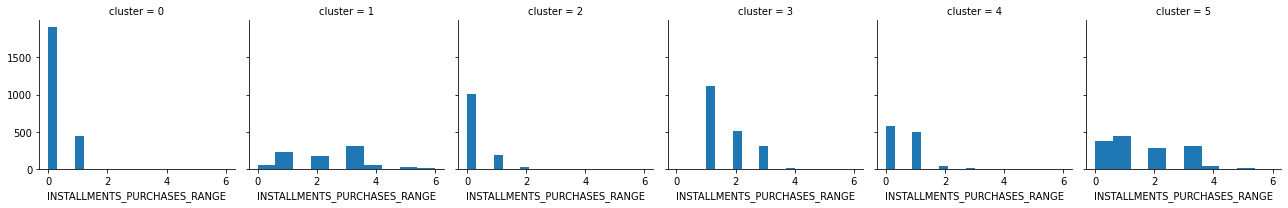

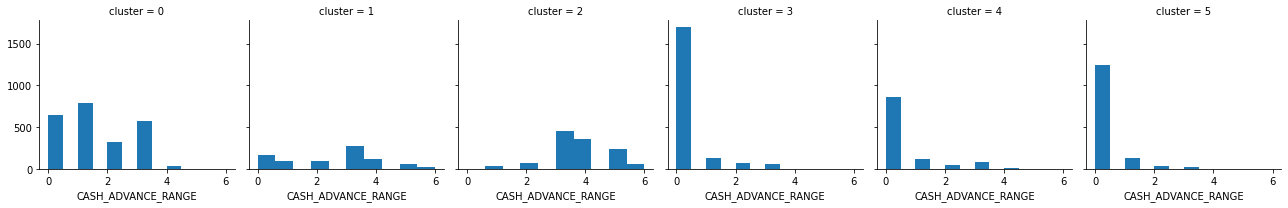

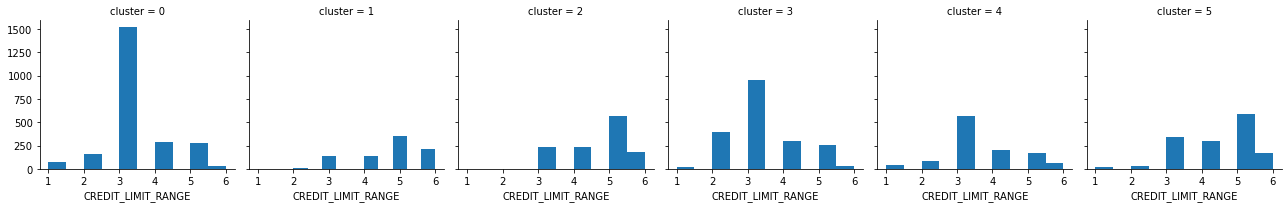

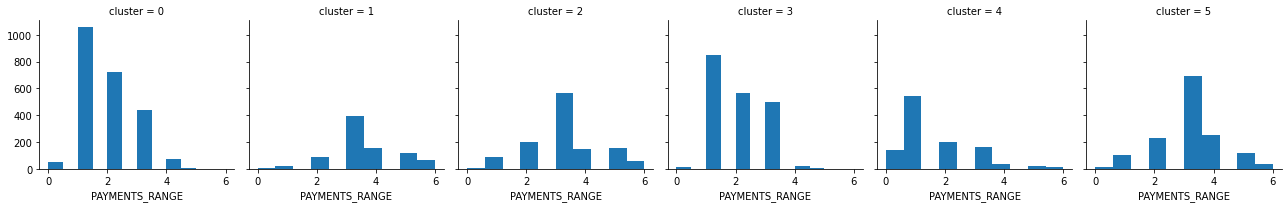

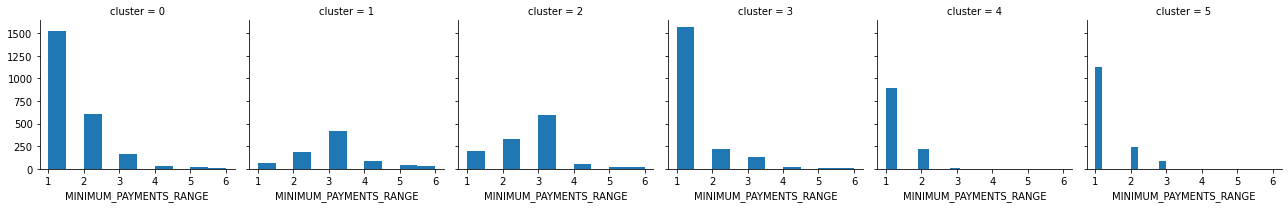

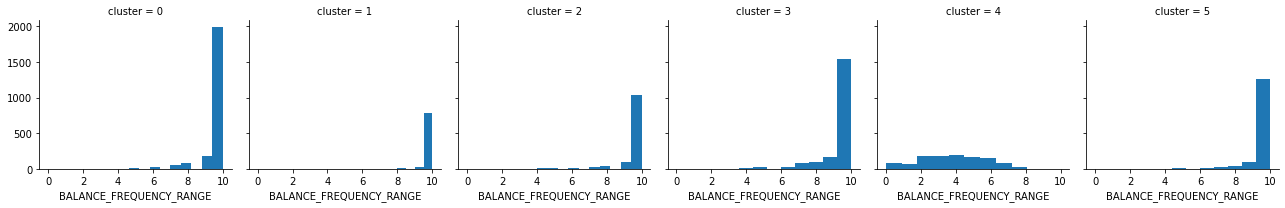

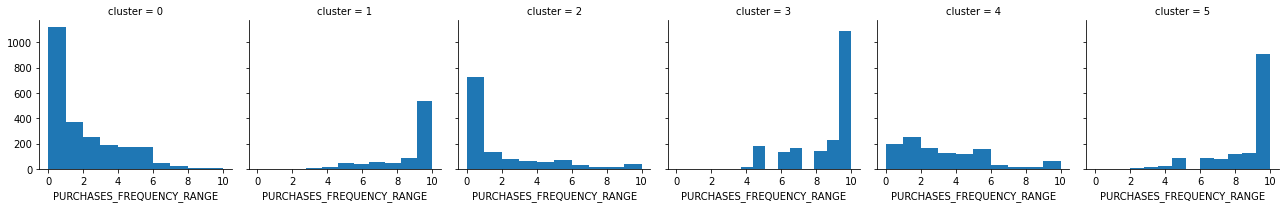

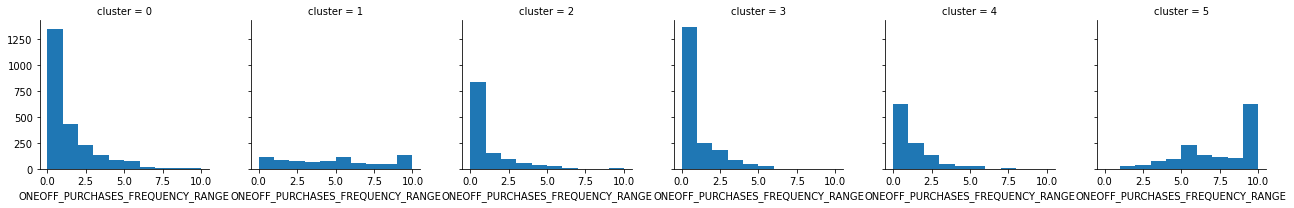

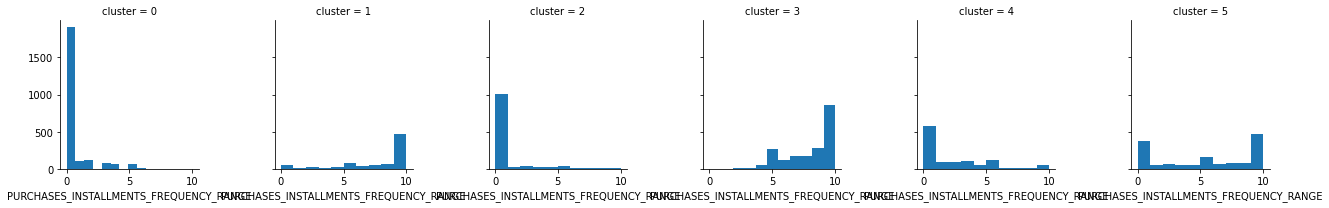

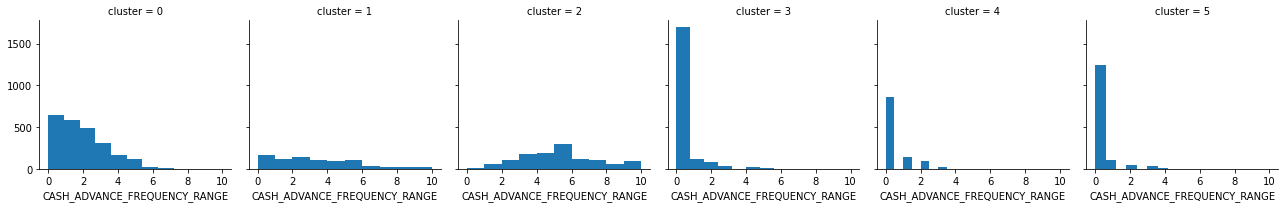

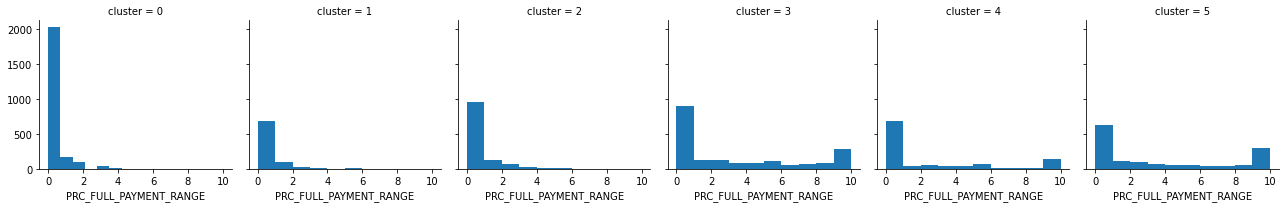

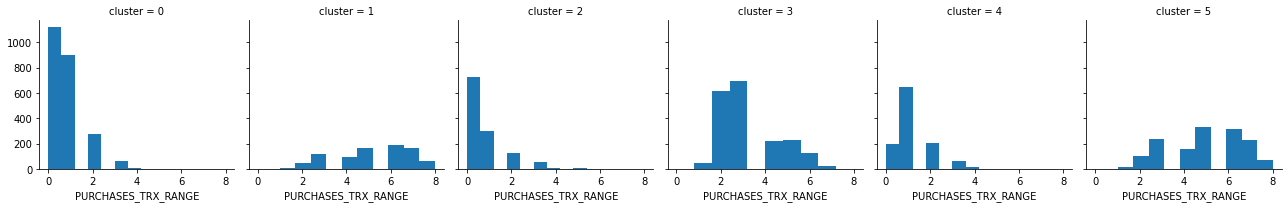

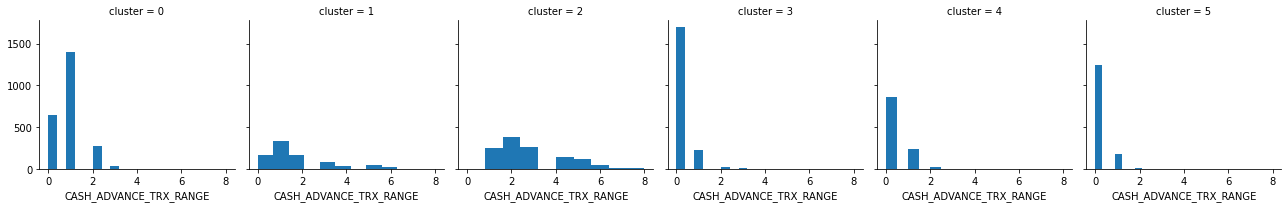

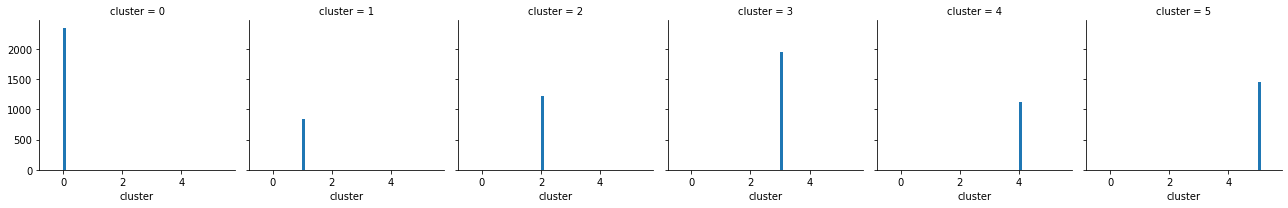

In [21]:
for c in ccData:
    grid= sns.FacetGrid(ccData, col='cluster')
    grid.map(plt.hist, c)

**Clúster 0:** Personas con límite de crédito medio-alto que hacen todo tipo de compras.

**Clúster 1:** Personas con más pagos vencidos y que realizan avances en efectivo con más frecuencia.

**Clúster 2:** Personas menos gastadores de dinero, con límites de crédito medio-alto y que realizan compras principalmente a diferentes cuotas.

**Clúster 3:** Personas con límite de crédito alto que realizan más avance en efectivo.

**Clúster 4:** Personas de gastos elevados, con crédito alto y que realizan compras costosas.

**Clúster 5:** Personas que no gastan mucho dinero y que tienen un límite de crédito medio-alto.

(El número del Clúster cambia cuando se ejecuta el algoritomo nuevamente)


# **VISUALIZACIÓN DE LOS DATOS**

In [22]:
#%% PCA
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

#dist = X


pca = PCA(2)
pca.fit(dist)

X_PCA = pca.transform(dist)
X_PCA.shape


print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.57015495 0.25212212]
sum:  0.822277078001439


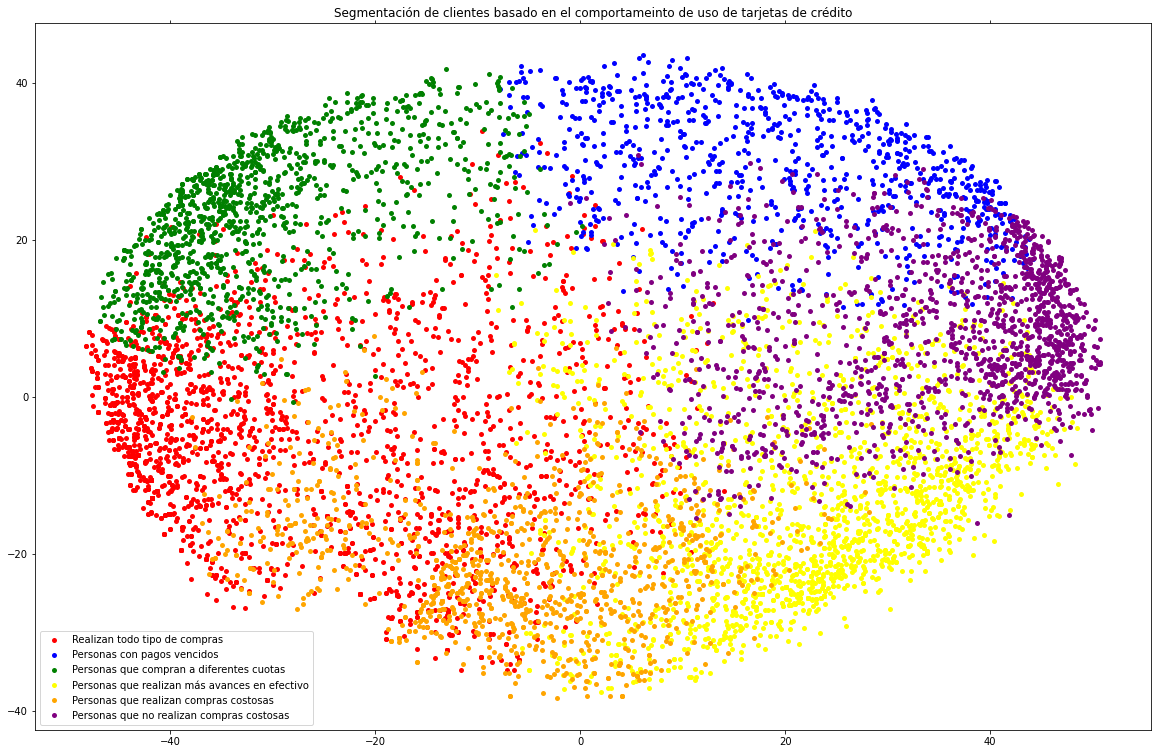

In [23]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
labels=clusters

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'Realizan todo tipo de compras', 
         1: 'Personas con pagos vencidos', 
         2: 'Personas que compran a diferentes cuotas', 
         3: 'Personas que realizan más avances en efectivo', 
         4: 'Personas que realizan compras costosas',
         5: 'Personas que no realizan compras costosas'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Segmentación de clientes basado en el comportameinto de uso de tarjetas de crédito")
plt.show()